### **Лабораторна робота Nо4**

##### **Структури для роботи з великими обсягами даних в Python**

**Мета:** отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)

#### **Хід виконання роботи:**

##### **ПЕРШИЙ РІВЕНЬ**

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import timeit as ti
import matplotlib.pyplot as plt

In [2]:
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 

X = individual_household_electric_power_consumption.data.features 

X.to_csv("individual_household_electric_power_consumption.csv", index=False)

d:\Programms\Github\Лаба2\venv\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


**Data Frame**

In [2]:
df = pd.read_csv("individual_household_electric_power_consumption.csv")

print(df)

               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

C:\Users\Admin\AppData\Local\Temp\ipykernel_78100\1630334127.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("individual_household_electric_power_consumption.csv")


In [3]:
df = pd.read_csv('individual_household_electric_power_consumption.csv', delimiter=',', na_values='?', header=0, dtype={ 
"Date": str, 
"Time": str, 
"Global_active_power": float, 
"Global_reactive_power": float, 
"Voltage": float, 
"Global_intensity": float, 
"sub_metering_1": float, 
"Sub_metering_2": float, 
"Sub_metering_3": float 
})

df['DateTime'] = pd.to_datetime(df['Date'] + " " + df['Time'], format="%d/%m/%Y %H:%M:%S") 
df.drop(['Date', 'Time'], axis=1, inplace=True) 
df.insert(0, 'DateTime', df.pop('DateTime')) 

df.dropna(inplace=True) 

print(df) 

                   DateTime  Global_active_power  Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                  0.418   
1       2006-12-16 17:25:00                5.360                  0.436   
2       2006-12-16 17:26:00                5.374                  0.498   
3       2006-12-16 17:27:00                5.388                  0.502   
4       2006-12-16 17:28:00                3.666                  0.528   
...                     ...                  ...                    ...   
2075254 2010-11-26 20:58:00                0.946                  0.000   
2075255 2010-11-26 20:59:00                0.944                  0.000   
2075256 2010-11-26 21:00:00                0.938                  0.000   
2075257 2010-11-26 21:01:00                0.934                  0.000   
2075258 2010-11-26 21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84             

**NumPy Array**

In [4]:
numpyarray = df.to_numpy() 

DateTime = 0
Global_active_power = 1 
Global_reactive_power = 2 
Voltage = 3 
Global_intensity = 4 
Sub_metering_1 = 5 
Sub_metering_2 = 6 
Sub_metering_3 = 7 

print(numpyarray[:5]) 

[[Timestamp('2006-12-16 17:24:00') 4.216 0.418 234.84 18.4 0.0 1.0 17.0]
 [Timestamp('2006-12-16 17:25:00') 5.36 0.436 233.63 23.0 0.0 1.0 16.0]
 [Timestamp('2006-12-16 17:26:00') 5.374 0.498 233.29 23.0 0.0 2.0 17.0]
 [Timestamp('2006-12-16 17:27:00') 5.388 0.502 233.74 23.0 0.0 1.0 17.0]
 [Timestamp('2006-12-16 17:28:00') 3.666 0.528 235.68 15.8 0.0 1.0 17.0]]


#### **1. Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.**

In [5]:
def df_power_exceeds(df): 
    power_exceeds = df[df['Global_active_power'] > 5] 
    return power_exceeds 

def numpyarray_power_exceeds(numpyarray): 
    power_exceeds = numpyarray[numpyarray[:, Global_active_power] > 5] 
    return power_exceeds 

print("Pandas DataFrame") 
print(df_power_exceeds(df).head()) 
pandas_time = ti.timeit(lambda: df_power_exceeds(df), number=1) 
print(f"Pandas DataFrame filter time: {pandas_time} seconds") 

print("NumPy Array") 
print(numpyarray_power_exceeds(numpyarray)) 
numpy_time = ti.timeit(lambda: numpyarray_power_exceeds(numpyarray), number=1) 
print(f"NumPy Array filter time: {numpy_time} seconds")

Pandas DataFrame
              DateTime  Global_active_power  Global_reactive_power  Voltage  \
1  2006-12-16 17:25:00                5.360                  0.436   233.63   
2  2006-12-16 17:26:00                5.374                  0.498   233.29   
3  2006-12-16 17:27:00                5.388                  0.502   233.74   
11 2006-12-16 17:35:00                5.412                  0.470   232.78   
12 2006-12-16 17:36:00                5.224                  0.478   232.99   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0  
Pandas DataFrame filter time: 0.004610799951478839 seconds
NumPy Array
[[Timestamp

#### **2. Обрати всі записи, у яких вольтаж перевищую 235 В.**

In [6]:
def df_voltage(df): 
    voltage = df[df['Voltage'] > 235] 
    return voltage 

def numpyarray_voltage(numpyarray): 
     voltage = numpyarray[numpyarray[:, Voltage] > 235] 
     return voltage 

print("Pandas DataFrame") 
print(df_voltage(df).head()) 
pandas_time = ti.timeit(lambda: df_voltage(df), number=1) 
print(f"Pandas DataFrame filter time: {pandas_time} seconds") 

print("NumPy Array") 
print(numpyarray_voltage(numpyarray)) 
numpy_time = ti.timeit(lambda: numpyarray_voltage(numpyarray), number=1) 
print(f"NumPy Array filter time: {numpy_time} seconds")

Pandas DataFrame
              DateTime  Global_active_power  Global_reactive_power  Voltage  \
4  2006-12-16 17:28:00                3.666                  0.528   235.68   
5  2006-12-16 17:29:00                3.520                  0.522   235.02   
6  2006-12-16 17:30:00                3.702                  0.520   235.09   
7  2006-12-16 17:31:00                3.700                  0.520   235.22   
14 2006-12-16 17:38:00                4.054                  0.422   235.24   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0  
Pandas DataFrame filter time: 0.059592099976725876 seconds
NumPy Array
[[Timestamp

#### **3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.**

In [7]:
def df_sub_m2_more_than_sub_m3(df): 
    df_intensity_range = df[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)] 
    sub_m2_more_than_sub_m3 = df_intensity_range[(df_intensity_range['Sub_metering_2']) > (df_intensity_range['Sub_metering_3'])] 
    return sub_m2_more_than_sub_m3 

def numpyarray_sub_m2_more_than_sub_m3(numpyarray): 
    numpyarray_intensity_range = numpyarray[(numpyarray[:, Global_intensity] >= 19) & (numpyarray[:, Global_intensity] <= 20)] 
    sub_m2_more_than_sub_m3 = numpyarray_intensity_range[numpyarray_intensity_range[:, Sub_metering_2] > numpyarray_intensity_range[:, Sub_metering_3]] 
    return sub_m2_more_than_sub_m3 

print("Pandas DataFrame") 
print(df_sub_m2_more_than_sub_m3(df).head()) 
pandas_time = ti.timeit(lambda: df_sub_m2_more_than_sub_m3(df), number=1) 
print(f"Pandas DataFrame filter time: {pandas_time} seconds") 

print("NumPy Array") 
print(numpyarray_sub_m2_more_than_sub_m3(numpyarray)) 
numpy_time = ti.timeit(lambda: numpyarray_sub_m2_more_than_sub_m3(numpyarray), number=1) 
print(f"NumPy Array filter time: {numpy_time} seconds")

Pandas DataFrame
               DateTime  Global_active_power  Global_reactive_power  Voltage  \
45  2006-12-16 18:09:00                4.464                  0.136   234.66   
460 2006-12-17 01:04:00                4.582                  0.258   238.08   
464 2006-12-17 01:08:00                4.618                  0.104   239.61   
475 2006-12-17 01:19:00                4.636                  0.140   237.37   
476 2006-12-17 01:20:00                4.634                  0.152   237.17   

     Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
45               19.0             0.0            37.0            16.0  
460              19.6             0.0            13.0             0.0  
464              19.6             0.0            27.0             0.0  
475              19.4             0.0            36.0             0.0  
476              19.4             0.0            35.0             0.0  
Pandas DataFrame filter time: 0.008151700021699071 seconds
NumPy Array

#### **4. Обрати випадковим чином 500000 записів (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії**

In [8]:
def df_random_sample_mean(df): 
    random_indices = df.sample(n=500000, replace=False) 
    random_sample_mean = random_indices[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean() 
    return random_sample_mean 

def numpyarray_random_sample_mean(numpyarray): 
    random_indices = numpyarray[np.random.choice(numpyarray.shape[0], 500000, replace=False)] 
    random_sample_mean = np.mean(random_indices[:, Sub_metering_1:Sub_metering_3+1], axis=0) 
    return random_sample_mean 

print("Pandas DataFrame") 
print(df_random_sample_mean(df).head()) 
pandas_time = ti.timeit(lambda: df_random_sample_mean(df), number=1) 
print(f"Pandas DataFrame filter time: {pandas_time} seconds") 

print("NumPy Array") 
print(numpyarray_random_sample_mean(numpyarray)) 
numpy_time = ti.timeit(lambda: numpyarray_random_sample_mean(numpyarray), number=1) 
print(f"NumPy Array filter time: {numpy_time} seconds")

Pandas DataFrame
Sub_metering_1    1.121760
Sub_metering_2    1.303642
Sub_metering_3    6.478984
dtype: float64
Pandas DataFrame filter time: 0.09599779994459823 seconds
NumPy Array
[1.133798 1.303862 6.47321]
NumPy Array filter time: 0.3452314999885857 seconds


#### **5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.**

In [13]:
def df_electricity_consumption(df): 
    after_18 = df[df['DateTime'].dt.hour >= 18] 
    power_exceeds = after_18[after_18['Global_active_power'] > 6] 
    high_group_2 = power_exceeds[(power_exceeds["Sub_metering_2"] > power_exceeds['Sub_metering_1'])&(power_exceeds["Sub_metering_2"] > power_exceeds["Sub_metering_3"])] 
    half = len(high_group_2) 
    first_part = high_group_2[:half] 
    second_part = high_group_2[half:] 
    every_third = first_part[::3] 
    every_fourth = second_part[::4] 
    result = pd.concat([every_third, every_fourth]) 
    return result 

def numpyarray_electricity_consumption(numpyarray): 
    hours = np.array([dt.hour for dt in numpyarray[:, DateTime]]) 
    after_18 = numpyarray[hours > 18] 
    power_exceeds = after_18[after_18[:, Global_active_power] > 6] 
    high_group_2 = power_exceeds[(power_exceeds[:, Sub_metering_2] > power_exceeds[:, Sub_metering_1])&(power_exceeds[:, Sub_metering_2] > power_exceeds[:, Sub_metering_3])]
    half = len(high_group_2) 
    first_part = high_group_2[:half] 
    second_part = high_group_2[half:] 
    every_third = first_part[::3] 
    every_fourth = second_part[::4] 
    result = np.concatenate([every_third, every_fourth]) 
    return result


print("Pandas DataFrame") 
print(df_electricity_consumption(df).head()) 
pandas_time = ti.timeit(lambda: df_electricity_consumption(df), number=1) 
print(f"Pandas DataFrame filter time: {pandas_time} seconds") 

print("NumPy Array") 
print(numpyarray_electricity_consumption(numpyarray)) 
numpy_time = ti.timeit(lambda: numpyarray_electricity_consumption(numpyarray), number=1) 
print(f"NumPy Array filter time: {numpy_time} seconds")

Pandas DataFrame
                 DateTime  Global_active_power  Global_reactive_power  \
41    2006-12-16 18:05:00                6.052                  0.192   
44    2006-12-16 18:08:00                6.308                  0.116   
17494 2006-12-28 20:58:00                6.386                  0.374   
17498 2006-12-28 21:02:00                8.088                  0.262   
17501 2006-12-28 21:05:00                7.230                  0.152   

       Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       Sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498            17.0  
17501          

#### **Висновки:**

Завдання      Pandas      Numpy
1             0.00543	 0.03082
2             0.05755	 0.18646
3             0.01187	 0.06021
4             0.12401	 0.29970
5             0.05912	 0.17993

Pandas показав кращі результати у всіх завданнях.
Pandas ефективніший для операцій з табличними даними (фільтрація, групування, агрегація) через оптимізацію.
NumPy краще підходить для чистих математичних операцій (наприклад, матричні обчислення), де важлива швидкість низькорівневих операцій.

**Оцінка:**
Pandas - 5/5 (Більш зручніший у використані).
Numpy - 3/5.

##### **ДРУГИЙ РІВЕНЬ**

In [14]:
from scipy.stats import pearsonr, spearmanr 
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns 

In [ ]:
auto_mpg = fetch_ucirepo(id=9) 

X = auto_mpg.data.features 

X.to_csv("auto_mpg.csv", index=False)

**Data Frame**

In [63]:
df = pd.read_csv("auto_mpg.csv", delimiter=',', header=0, dtype={ 
"displacement": float, 
"cylinders": int, 
"horsepower": float, 
"weight": int, 
"acceleration": float, 
"model_year": int, 
"origin": int
})

print(df) 

     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

**NumPy Array**

In [64]:
numpyarray = df.to_numpy() 

displacement = 0
cylinders = 1
horsepower = 2  
weight = 3  
acceleration = 4  
model_year = 5
origin = 6

print(numpyarray) 

[[307.    8.  130.  ...  12.   70.    1. ]
 [350.    8.  165.  ...  11.5  70.    1. ]
 [318.    8.  150.  ...  11.   70.    1. ]
 ...
 [135.    4.   84.  ...  11.6  82.    1. ]
 [120.    4.   79.  ...  18.6  82.    1. ]
 [119.    4.   82.  ...  19.4  82.    1. ]]


#### **1. Поборотися із зниклими даними.**

In [65]:
print("Pandas Dataframe")
print(df.isnull().sum())
print("\nNumpy Array")
print(np.isnan(numpyarray).sum(axis=0))

Pandas Dataframe
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Numpy Array
[0 0 6 0 0 0 0]


In [52]:
df = df.dropna(subset=['horsepower'])

mask = ~np.isnan(numpyarray[:, 2])
numpyarray = numpyarray[mask]

print("NumPy Array")
print(numpyarray)
print(np.isnan(numpyarray).sum(axis=0))

print("\nPandas Dataframe")
print(df)
print(df.isnull().sum())



NumPy Array
[[307.    8.  130.  ...  12.   70.    1. ]
 [350.    8.  165.  ...  11.5  70.    1. ]
 [318.    8.  150.  ...  11.   70.    1. ]
 ...
 [135.    4.   84.  ...  11.6  82.    1. ]
 [120.    4.   79.  ...  18.6  82.    1. ]
 [119.    4.   82.  ...  19.4  82.    1. ]]
[0 0 0 0 0 0 0]

Pandas Dataframe
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6    

#### **2. Пронормувати вибраний датасет або стандартизувати його (нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).**

In [66]:
def normalize_df(df): 
    normalized_df = df.copy() 
    for col in normalized_df.columns: 
        if pd.api.types.is_numeric_dtype(normalized_df[col]): 
            min_value = normalized_df[col].min() 
            max_value = normalized_df[col].max() 
            if max_value != min_value: 
                normalized_df[col] = (normalized_df[col] - min_value) / (max_value - min_value) 
            else: 
                normalized_df[col] = 0 
    return normalized_df 

def normalize_numpy(numpy):
    normalized_numpy = numpy.copy().astype(float)
    for col_idx in range(numpy.shape[1]):
        col_data = normalized_numpy[:, col_idx]
        if np.issubdtype(col_data.dtype, np.number):
            min_val = np.nanmin(col_data)
            max_val = np.nanmax(col_data)
            if max_val != min_val:
                normalized_numpy[:, col_idx] = (col_data - min_val) / (max_val - min_val)
            else:
                normalized_numpy[:, col_idx] = 0
    return normalized_numpy


normalized_df = normalize_df(df) 
normalized_numpy = normalize_numpy(numpyarray)

print("NumPy Array")
print(normalized_numpy)

print("\nPandas Dataframe")
print(normalized_df)

NumPy Array
[[0.61757106 1.         0.45652174 ... 0.23809524 0.         0.        ]
 [0.72868217 1.         0.64673913 ... 0.20833333 0.         0.        ]
 [0.64599483 1.         0.56521739 ... 0.17857143 0.         0.        ]
 ...
 [0.17312661 0.2        0.20652174 ... 0.21428571 1.         0.        ]
 [0.13436693 0.2        0.17934783 ... 0.63095238 1.         0.        ]
 [0.13178295 0.2        0.19565217 ... 0.67857143 1.         0.        ]]

Pandas Dataframe
     displacement  cylinders  horsepower    weight  acceleration  model_year  \
0        0.617571        1.0    0.456522  0.536150      0.238095         0.0   
1        0.728682        1.0    0.646739  0.589736      0.208333         0.0   
2        0.645995        1.0    0.565217  0.516870      0.178571         0.0   
3        0.609819        1.0    0.565217  0.516019      0.238095         0.0   
4        0.604651        1.0    0.510870  0.520556      0.148810         0.0   
..            ...        ...         ...      

#### **3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.**

**Pandas DataFrame**

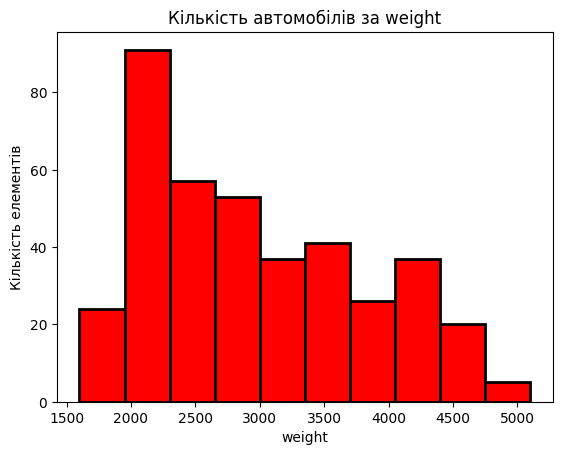

In [54]:
attr = 'weight' 
bins = [1600, 1950, 2300, 2650, 3000, 3350, 3700, 4050, 4400, 4750, 5100]

plt.hist(df[attr], bins=bins, color='red', edgecolor='black', linewidth=2) 
plt.xlabel(attr) 
plt.ylabel('Кількість елементів') 
plt.title(f"Кількість автомобілів за {attr}") 
plt.show()


**NumPy Array**

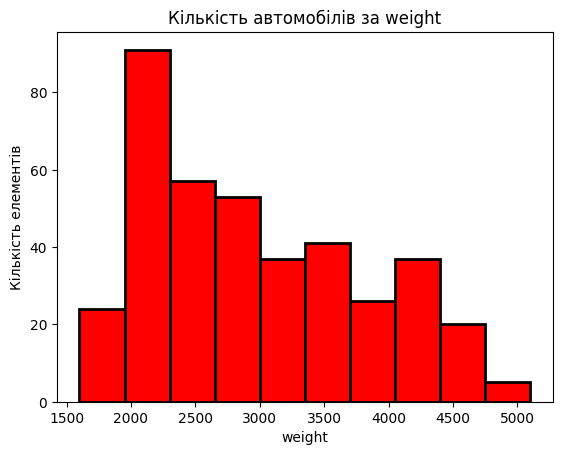

In [55]:
weight_numpy = numpyarray[:, 3]

plt.hist(weight_numpy, bins=bins, color='red', edgecolor='black', linewidth=2)
plt.xlabel('weight') 
plt.ylabel('Кількість елементів') 
plt.title("Кількість автомобілів за weight") 
plt.show()

#### **4. Збудувати графік залежності одного integer/real атрибута від іншого.**

**Pandas DataFrame**

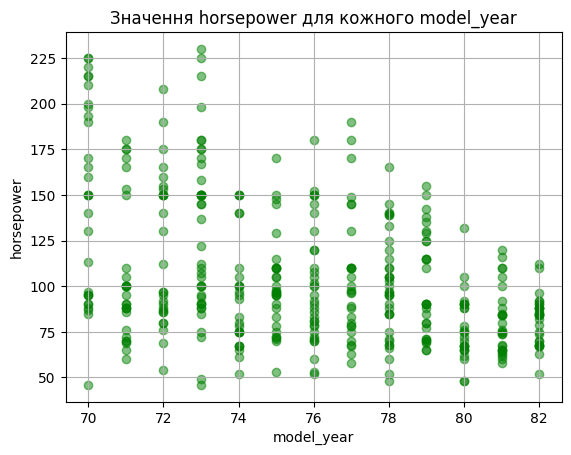

In [56]:
x = 'model_year'
y = 'horsepower' 

plt.scatter(df[x], df[y], color='green', alpha=0.5) 
plt.xlabel(x) 
plt.ylabel(y) 
plt.title(f'Значення {y} для кожного {x}') 
plt.grid(True) 
plt.show()

**NumPy Array**

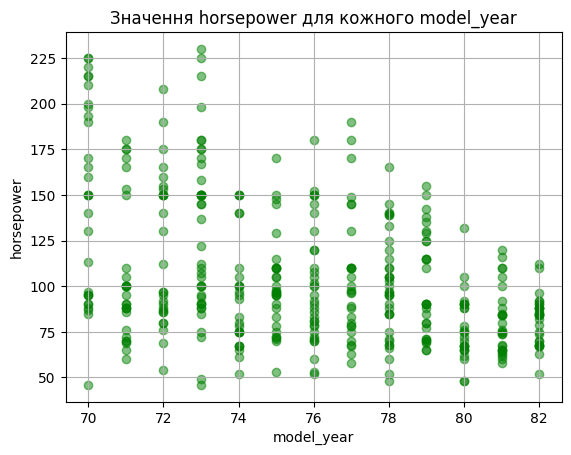

In [57]:
x_idx = 5  # model_year
y_idx = 2  # horsepower

plt.scatter(numpyarray[:, x_idx], numpyarray[:, y_idx], color='green', alpha=0.5)
plt.xlabel('model_year') 
plt.ylabel('horsepower') 
plt.title(f'Значення horsepower для кожного model_year') 
plt.grid(True) 
plt.show()

#### **5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.**

**Pandas DataFrame**

In [60]:
x_attr = 'acceleration' 
y_attr = 'horsepower' 

x = df[x_attr] 
y = df[y_attr] 

pearson_coef, _ = pearsonr(x, y) 
spearman_coef, _ = spearmanr(x, y) 
print(f"Pearson coefficient: {pearson_coef}") 
print (f"Spearman coefficient: {spearman_coef}")

Pearson coefficient: -0.6891955103342365
Spearman coefficient: -0.6581423040218369


**NumPy Array**

In [59]:
x_numpy = numpyarray[:, 4]  # acceleration
y_numpy = numpyarray[:, 2]  # horsepower

pearson_coef, _ = pearsonr(x_numpy, y_numpy)
spearman_coef, _ = spearmanr(x_numpy, y_numpy)
print(f"Pearson coefficient: {pearson_coef}") 
print (f"Spearman coefficient: {spearman_coef}")

Pearson coefficient: -0.6891955103342365
Spearman coefficient: -0.6581423040218369


#### **6. Провести One Hot Encoding категоріального string атрибуту.**

**Pandas DataFrame**

In [61]:
encoder = OneHotEncoder(sparse_output=False) 

encoded_data = encoder.fit_transform(df[['origin']]) 
encoded_cols = [f"origin_{categories}" for categories in encoder.categories_[0]] 
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index) 
result_df = pd.concat([df, encoded_df], axis=1) 

print("Encoded:") 
print(result_df) 

Encoded:
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  origin_1  origin_2  origin_3  
0         

**NumPy Array**

In [62]:
encoder = OneHotEncoder(sparse_output=False) 

unique_origins = np.unique(numpyarray[:, 6])
encoded_origins = np.zeros((numpyarray.shape[0], len(unique_origins)))
for i, origin in enumerate(unique_origins):
    encoded_origins[:, i] = (numpyarray[:, 6] == origin)

result_numpy = np.hstack((numpyarray, encoded_origins))

print("Encoded:") 
print(result_numpy) 

Encoded:
[[307.   8. 130. ...   1.   0.   0.]
 [350.   8. 165. ...   1.   0.   0.]
 [318.   8. 150. ...   1.   0.   0.]
 ...
 [135.   4.  84. ...   1.   0.   0.]
 [120.   4.  79. ...   1.   0.   0.]
 [119.   4.  82. ...   1.   0.   0.]]


#### **7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.**

##### **Матриця парної кореляції через теплову карту**

**Pandas DataFrame**

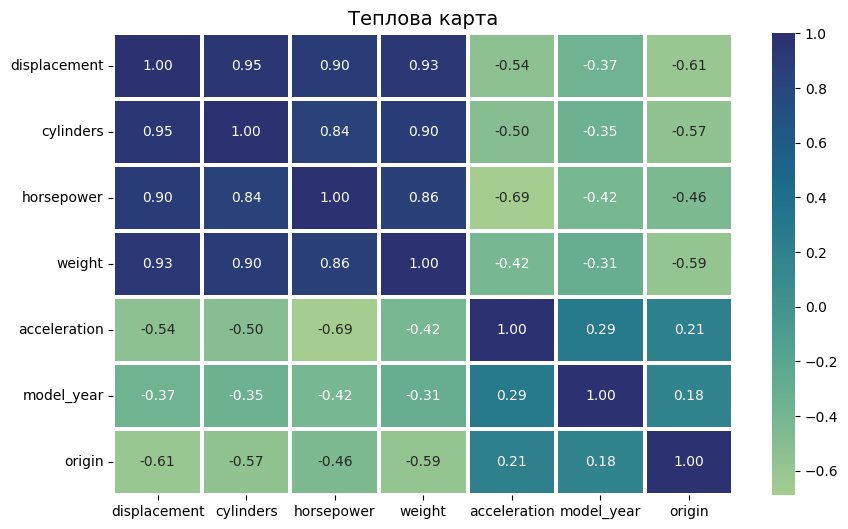

In [24]:
plt.figure(figsize=(10, 6)) 
corr = df.corr() 
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f", linewidth=1.5) 
plt.title('Теплова карта', fontsize=14) 
plt.show()

**NumPy Array**

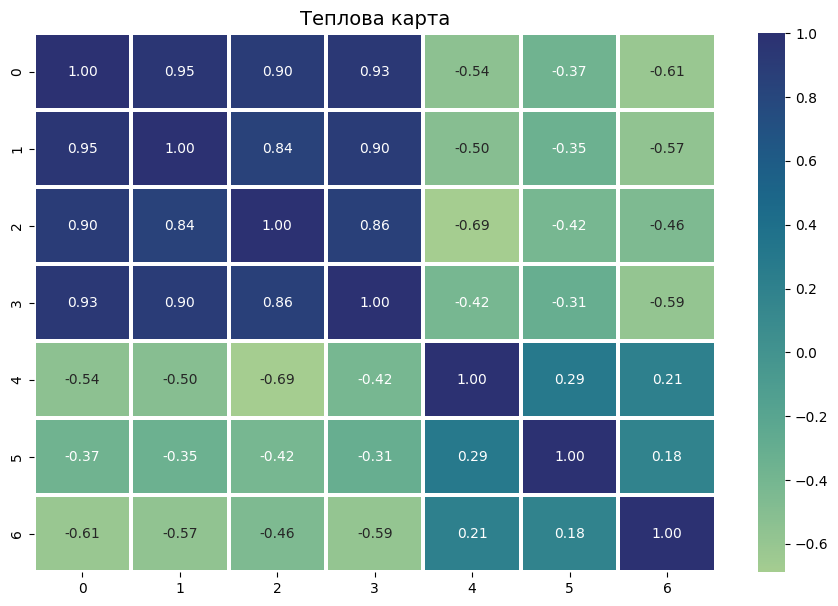

In [25]:
plt.figure(figsize=(11, 7)) 
corr_matrix = np.corrcoef(numpyarray, rowvar=False)
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", linewidth=1.5)
plt.title('Теплова карта', fontsize=14) 
plt.show()


##### **Парна діаграма розсіювання**

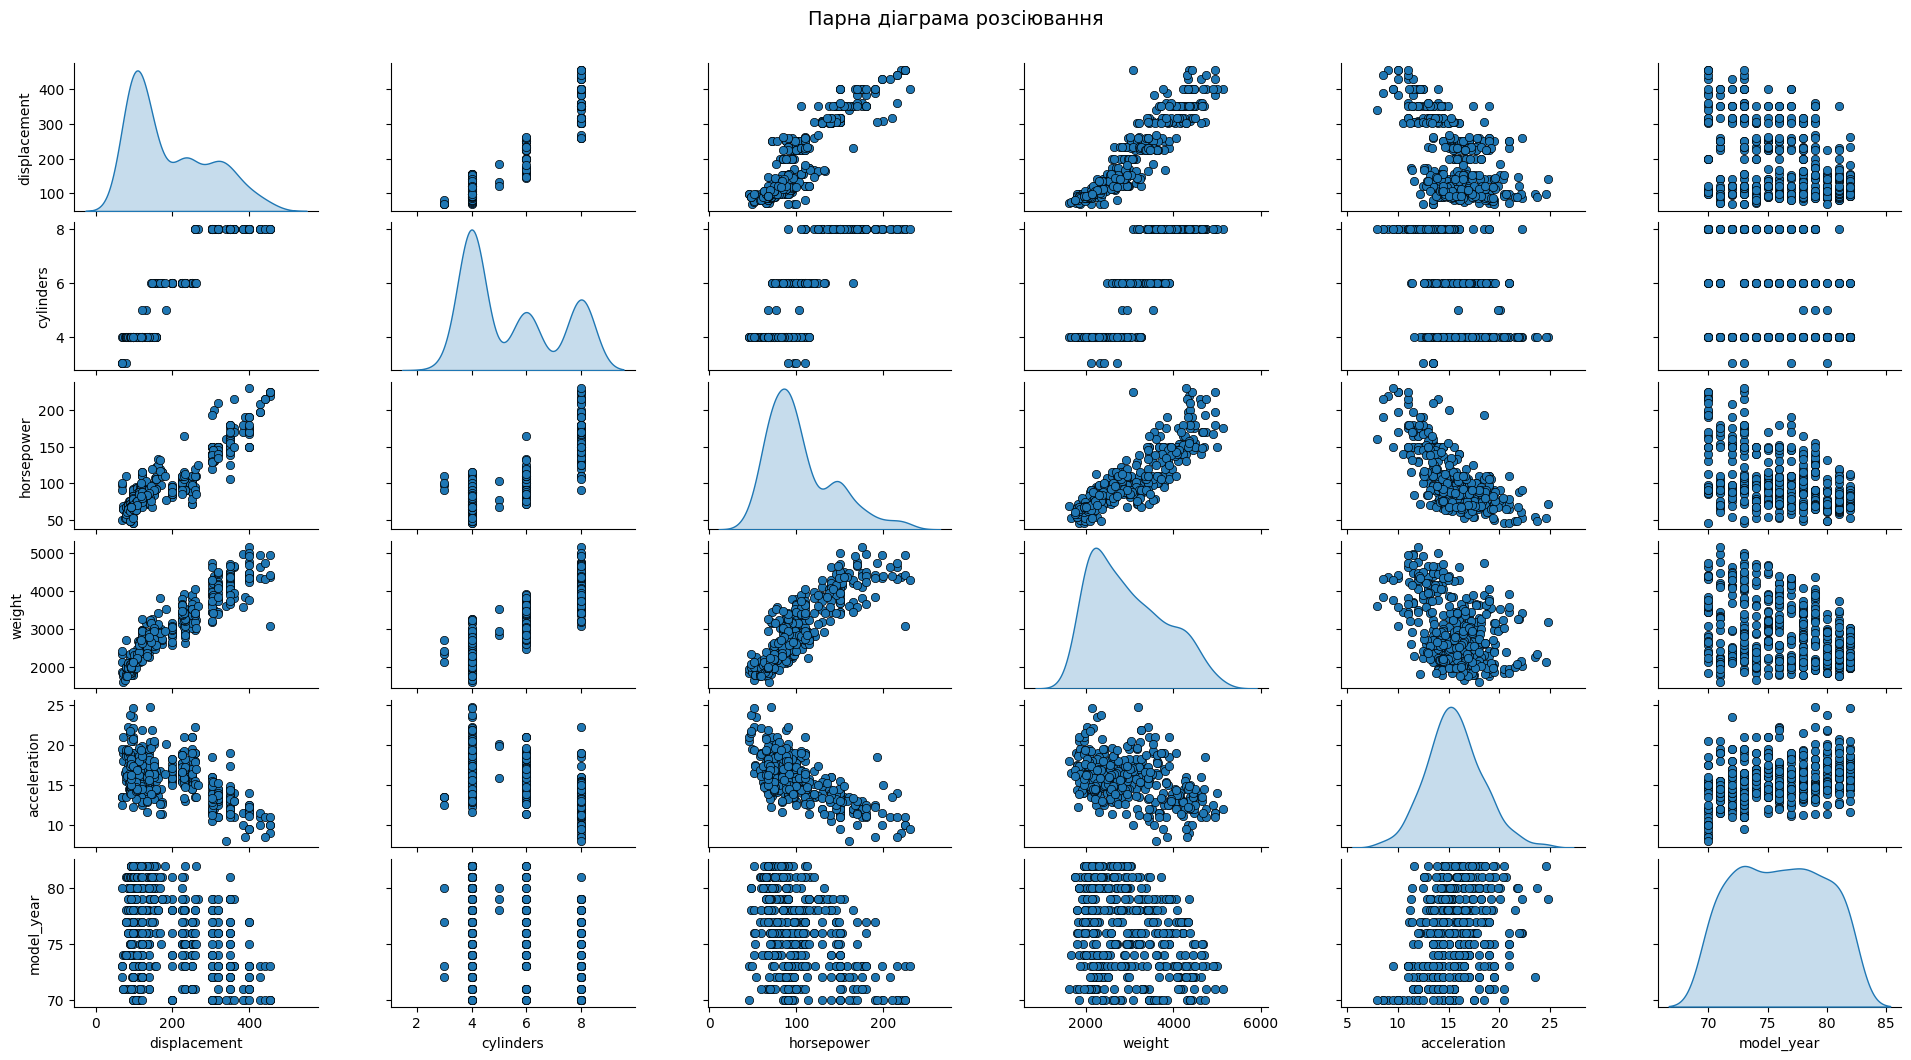

In [ ]:
cols = ['displacement',  'cylinders',  'horsepower',  'weight',  'acceleration',  'model_year']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(fill=True))
fig = pp.figure 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Парна діаграма розсіювання', fontsize=14)
plt.show()